In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np

In [2]:
seed = [85387, 167102, 578561, 979676]
series_seed = [12245, 23928, 5905072]
simulations = ['first', 'last']
stimulus = [0, 1, 4]
stimulus_id = [4918, 180160, 227728, 294899, 366797, 408166, 599593, 983115]
n_times = 6
n_neurons = 1000

index = pd.MultiIndex.from_product(
    [seed, series_seed, simulations, stimulus, stimulus_id],
    names=['seed', 'series_seed', 'simulations', 'stimulus', 'stimulus_id']
)

np.random.seed(0)
values = [np.random.rand(n_times * n_neurons).round().reshape(n_times, n_neurons) for i in range(len(index))]
raw = pd.Series(values, index=index)
display(raw)

seed    series_seed  simulations  stimulus  stimulus_id
85387   12245        first        0         4918           [[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0,...
                                            180160         [[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0,...
                                            227728         [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0,...
                                            294899         [[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,...
                                            366797         [[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0,...
                                                                                 ...                        
979676  5905072      last         4         294899         [[1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,...
                                            366797         [[0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0,...
                                            408166         [[0.0, 0.0, 0

In [3]:
import simProjectAnalysis as spa
data = spa.ConditionCollection.from_pandas(raw)
for cond in data.conditions():
    print("{0}: {1}".format(cond, data.labels_of(cond)))


seed: [85387, 167102, 578561, 979676]
series_seed: [12245, 23928, 5905072]
simulations: ['first', 'last']
stimulus: [0, 1, 4]
stimulus_id: [4918, 180160, 227728, 294899, 366797, 408166, 599593, 983115]


In [4]:
tmp = data.filter(stimulus=1)
for cond in tmp.conditions():
    print("{0}: {1}".format(cond, tmp.labels_of(cond)))

seed: [85387, 167102, 578561, 979676]
series_seed: [12245, 23928, 5905072]
simulations: ['first', 'last']
stimulus: [1]
stimulus_id: [4918, 180160, 227728, 294899, 366797, 408166, 599593, 983115]


In [5]:
data = data.remove_label("series_seed")
data = data.remove_label("stimulus")
display(data.to_pandas())

seed    simulations  stimulus_id
85387   first        4918           [[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0,...
                     180160         [[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0,...
                     227728         [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0,...
                     294899         [[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,...
                     366797         [[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0,...
                                                          ...                        
979676  last         294899         [[1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,...
                     366797         [[0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0,...
                     408166         [[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,...
                     599593         [[0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0,...
                     983115         [[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0,...
Length: 576, dtype: o

In [6]:
data.get()[0].shape

(6, 1000)

In [7]:
indices = range(200, 300)

def split_into_neurons(in_result):
    for idx in indices:
        yield in_result.res[:, idx], {"neuron_index": idx}

data.unpool(split_into_neurons)

__metadata__--> 57599|                                                                                                                                                                                    


In [8]:
display(data.to_pandas())
data.get()[0].shape

seed    simulations  stimulus_id  neuron_index
85387   first        4918         200             [0.0, 0.0, 0.0, 1.0, 1.0, 1.0]
                                  201             [1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
                                  202             [0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
                                  203             [0.0, 1.0, 1.0, 1.0, 1.0, 0.0]
                                  204             [0.0, 1.0, 1.0, 0.0, 0.0, 1.0]
                                                               ...              
979676  last         983115       295             [0.0, 1.0, 1.0, 1.0, 0.0, 1.0]
                                  296             [0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
                                  297             [0.0, 1.0, 1.0, 0.0, 0.0, 0.0]
                                  298             [1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
                                  299             [1.0, 0.0, 1.0, 0.0, 1.0, 1.0]
Length: 57600, dtype: object

(6,)

In [9]:
mean_response = data.map(np.mean)
display(mean_response.to_pandas())

seed    simulations  stimulus_id  neuron_index
85387   first        4918         200             0.500000
                                  201             0.500000
                                  202             0.333333
                                  203             0.666667
                                  204             0.500000
                                                    ...   
979676  last         983115       295             0.666667
                                  296             0.166667
                                  297             0.333333
                                  298             0.333333
                                  299             0.666667
Length: 57600, dtype: float64

In [10]:
from scipy.stats import entropy

def response_entropy(lst_responses):
    return entropy(lst_responses, base=2) / np.log2(len(lst_responses))

response_entropy_stims = mean_response.pool(["stimulus_id"], func=response_entropy)
display(response_entropy_stims.to_pandas())

simulations  seed    neuron_index
first        85387   200             0.977047
                     201             0.971147
                     202             0.974876
                     203             0.982291
                     204             0.980935
                                       ...   
last         979676  295             0.977905
                     296             0.975839
                     297             0.975716
                     298             0.969266
                     299             0.977476
Length: 800, dtype: float64

In [11]:
np.nanmean(response_entropy_stims.filter(simulations="first").get())

0.978633414978212

In [12]:
np.nanmean(response_entropy_stims.filter(simulations="last").get())

0.9782904973307328

In [13]:
def difference_first_last(lst_str, lst_vals):
    if not "first" in lst_str or not "last" in lst_str:
        return np.NaN
    i = lst_str.index("first")
    j = lst_str.index("last")
    return lst_vals[i] - lst_vals[j]

change_in_response_entropy_stims = response_entropy_stims.pool(
    ["simulations"], func=difference_first_last, xy=True
)
change_in_response_entropy_stims.to_pandas()

seed    neuron_index
85387   200            -0.004339
        201            -0.003890
        202            -0.010411
        203             0.001226
        204            -0.002496
                          ...   
979676  295             0.004445
        296            -0.005598
        297             0.008398
        298             0.011020
        299             0.001477
Length: 400, dtype: float64

<ErrorbarContainer object of 3 artists>

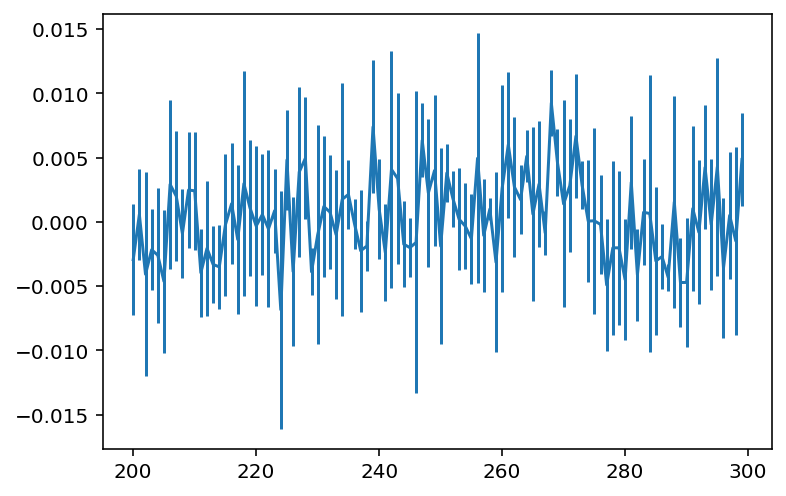

In [14]:
%matplotlib inline

change_stims_lst = change_in_response_entropy_stims.pool(["seed"], func=np.array)
change_stims_mn = change_stims_lst.map(np.nanmean)
change_stims_sd = change_stims_lst.map(np.nanstd)

x, mn = change_stims_mn.get_x_y("neuron_index")
sd = change_stims_sd.get()
from matplotlib import pyplot as plt
plt.errorbar(x, mn, yerr=sd)

<ErrorbarContainer object of 3 artists>

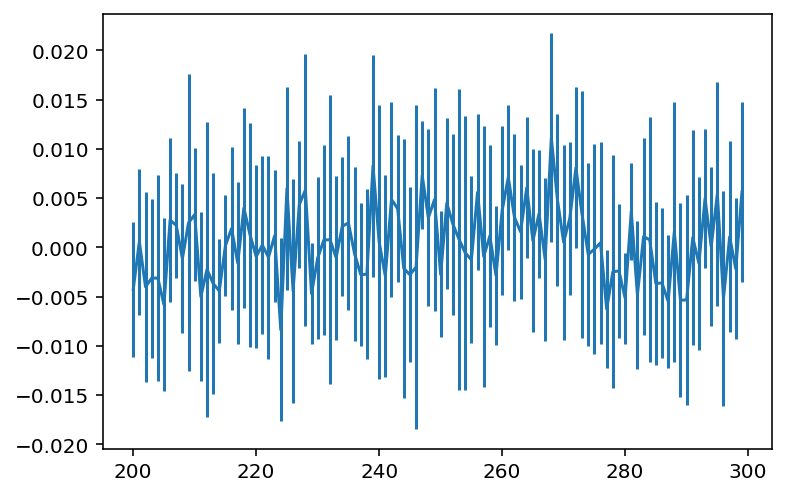

In [15]:
response_entropy_reps = mean_response.pool(["seed"], func=response_entropy)
change_in_response_entropy_reps = response_entropy_reps.pool(["simulations"], func=difference_first_last, xy=True)

change_reps_lst = change_in_response_entropy_reps.pool(["stimulus_id"], func=np.array)
change_reps_mn = change_reps_lst.map(np.nanmean)
change_reps_sd = change_reps_lst.map(np.nanstd)


x, mn = change_reps_mn.get_x_y("neuron_index")
sd = change_reps_sd.get()
plt.errorbar(x, mn, yerr=sd)


In [16]:
display(change_stims_lst.to_pandas())
display(change_reps_lst.to_pandas())

neuron_index
200             [-0.0043391160607407775, -0.003501428236283632...
201             [-0.003889770571593676, 0.005151607234236244, ...
202             [-0.010411389817057248, 0.00909843517483222, -...
203             [0.001225925403144923, -0.0055892349937192165,...
204             [-0.00249642230139413, 0.003172691828703611, -...
                                      ...                        
295             [0.016013192047242608, 0.004594144234846942, -...
296             [-0.0037048497008692616, -0.009988428146137429...
297             [-0.004889036981924555, -0.00188700866360203, ...
298             [-0.0072212122827081116, -0.005531930739711477...
299             [0.010413440501411131, 0.005806811450061233, 0...
Length: 100, dtype: object

neuron_index
200             [-0.005764175718614428, -0.009957545134492096,...
201             [-0.005681710875710233, -0.0042184747935247735...
202             [-0.019224295335098174, 0.011696587753735055, ...
203             [0.00023701215438720613, -0.018043146249577258...
204             [0.004675033912619697, 0.009602055198531745, 0...
                                      ...                        
295             [-0.0032429436130679834, -0.009672359002408482...
296             [-0.004684001384546388, -0.0024912183652565645...
297             [0.01676768493497005, -0.008404363751055688, -...
298             [-0.008698786917750612, -0.0037261618435626698...
299             [-0.0007860816892352185, 0.01737290132166447, ...
Length: 100, dtype: object

In [17]:
from scipy.stats import ttest_ind

def test_wo_nans(a, b):
    return ttest_ind(a[~np.isnan(a)], b[~np.isnan(b)]).pvalue

test_res = change_stims_lst.extended_map(test_wo_nans, [change_reps_lst], iterate_inner=True)
test_res.to_pandas()


neuron_index
200             0.752806
201             0.999093
202             0.990077
203             0.839344
204             0.934348
                  ...   
295             0.872998
296             0.808323
297             0.920983
298             0.890222
299             0.884827
Length: 100, dtype: float64

In [18]:
change_stims_lst.add_label("entropy_cond", "stimuli")
change_reps_lst.add_label("entropy_cond", "repetitions")
change_stims_lst.merge(change_reps_lst)
display(change_reps_lst)

def test_wo_nans(args):
    a, b = args
    return ttest_ind(a[~np.isnan(a)], b[~np.isnan(b)]).pvalue

test_res2 = change_stims_lst.pool(["entropy_cond"], func=test_wo_nans)
test_res2.to_pandas()


neuron_index
200             0.752806
201             0.999093
202             0.990077
203             0.839344
204             0.934348
                  ...   
295             0.872998
296             0.808323
297             0.920983
298             0.890222
299             0.884827
Length: 100, dtype: float64